## 1- Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras import callbacks

#--------------- If you have an error about gpu or cuda delete these two lines ------------------

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

#----------------------------------------------------------------------------------------------------


2022-05-24 14:12:27.110426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 14:12:27.136336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 14:12:27.136488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
from sklearn.metrics import confusion_matrix

## 2- Classification by angle


#### 2.1- Data import

Train

In [ ]:
train = pd.read_pickle("./train.pkl")

In [ ]:
X_train = np.array([train.iloc[i,:900].to_numpy().reshape((30, 30)) for i in range(len(train))])

In [ ]:
X_train.shape

In [ ]:
y_angles_train = train.iloc[:, -2]; 
y_gestures_train = train.iloc[:, -1]; 

In [ ]:
y_gestures_train.value_counts()

In [ ]:
y_angles_train.replace([0,45,90,135,180,225,270,315],[0,1,2,3,4,5,6,7], inplace=True) # replace angles by values from 0 to 7 (needed for classification)

In [ ]:
y_angles_train.value_counts()

In [ ]:
del train

Test

In [13]:
test = pd.read_pickle("./test.pkl")

In [14]:
X_test= np.array([test.iloc[i,:900].to_numpy().reshape((30, 30)) for i in range(len(test))])

In [15]:
X_test.shape

(5040, 30, 30)

In [16]:
y_angles_test = test.iloc[:, -2]
y_gestures_test = test.iloc[:, -1]; 

In [17]:
y_gestures_test.value_counts()

0.0     269
2.0     260
16.0    260
7.0     253
18.0    253
1.0     251
3.0     251
11.0    245
19.0    243
12.0    242
10.0    241
4.0     238
15.0    237
13.0    235
5.0     233
20.0    231
8.0     229
14.0    227
6.0     224
9.0     217
17.0    201
Name: gestures, dtype: int64

In [18]:
y_angles_test.replace([0,45,90,135,180,225,270,315],[0,1,2,3,4,5,6,7], inplace=True) # replace angles by values from 0 to 7 (needed for classification)

In [19]:
y_angles_test.value_counts()

1.0    655
7.0    653
0.0    641
5.0    638
3.0    637
4.0    618
2.0    606
6.0    592
Name: angles, dtype: int64

In [20]:
del test

## You can either use a pretrained model or train one.

#### 2-3 First we will use a model that we have already trained and saved

In [11]:
model_imported = keras.models.load_model('angles_augmented_97')
model_imported.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        128       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       16640     
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 256)      1

In [ ]:
model_imported.evaluate(X_test, y_angles_test) # evaluation on the test set

Confusion Matrix


In [ ]:
predict_x = model_imported.predict(X_test) 
classes_x = np.argmax(predict_x,axis=1)
classes_x

In [ ]:
m_angles = confusion_matrix(y_angles_test,classes_x)
m_angles

In [ ]:
plt.imshow(m_angles)
plt.colorbar()

#### 2-4 Or we can build a model and train it. The code below is how we build the model that we have just imported

We are using Convolutional Neural Networks

In [ ]:
model = tf.keras.Sequential()

model.add(tfl.Conv2D(64, (1, 1), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.Conv2D(256, (1, 1), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.MaxPooling2D((2, 2)))



model.add(tfl.Conv2D(64, (1, 1), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.Conv2D(256, (1, 1), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.MaxPooling2D((2, 2)))



model.add(tfl.Conv2D(64, (1, 1), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.Conv2D(256, (1, 1), activation='relu', input_shape=(30, 30, 1)))
model.add(tfl.BatchNormalization())

model.add(tfl.MaxPooling2D((2, 2)))


model.add(tfl.Flatten())

model.add(tfl.Dense(128, activation='relu'))

model.add(tfl.Dense(8, activation='softmax'))


model.compile(

    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'] 
)
model.summary()

This code train the model we have just built. The training takes time.

In [ ]:
history = model.fit(X_train, y_angles_train, 
                    epochs = 20, validation_data =(X_test, y_angles_test))

In [ ]:
model.evaluate(X_test, y_angles_test) # we test our model on the test set

Confusion Matrix

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

In [ ]:
m_angles = confusion_matrix(y_angles_test,classes_x)
m_angles

In [ ]:
plt.imshow(m_angles)
plt.colorbar()

To save the model

In [ ]:
model.save('angles_augmented_97')

## 3- Classification by gesture


## You can either use a pretrained model or train one.

#### 3-3 First we will use a model that we have already trained and saved

In [9]:
model_imported_gest = keras.models.load_model('gestures_augmented_84')
model_imported_gest.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            24320     
                                                                 
 batch_normalization (BatchN  (None, 30, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0

In [ ]:
y_gestures_test

In [ ]:
model_imported_gest.evaluate(X_test, y_gestures_test) # evaluation on the test set

Confusion Matrix


In [ ]:
predict_x = model_imported_gest.predict(X_test) 
classes_x = np.argmax(predict_x,axis=1)
classes_x

In [ ]:
m_gestures = confusion_matrix(y_gestures_test,classes_x)
m_gestures

In [ ]:
plt.imshow(m_gestures)
plt.colorbar()

#### 3-4 Or we can build a model and train it. The code below is how we build the model that we have just imported

We are using Convolutional Neural Networks

In [5]:
model = tf.keras.Sequential()

model.add(keras.Input(shape=(30, 30)))

model.add(tfl.LSTM(64, return_sequences=1))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(0.2))

model.add(tfl.LSTM(64, return_sequences=1))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(0.2))

model.add(tfl.LSTM(64, return_sequences=1))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(0.2))

model.add(tfl.LSTM(64, return_sequences=1))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(0.2))

model.add(tfl.LSTM(64, return_sequences=0))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(0.2))

model.add(tfl.Dense(64, activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(0.2))

model.add(tfl.Dense(21, activation='softmax'))


model.compile(

    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'] 
)
model.summary()

2022-05-24 14:12:37.715214: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-24 14:12:37.715777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 14:12:37.716019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 14:12:37.716189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            24320     
                                                                 
 batch_normalization (BatchN  (None, 30, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0

This code train the model we have just built. The training takes time.

In [ ]:
history = model.fit(X_train, y_gestures_train, 
                    epochs = 120, validation_data =(X_test, y_gestures_test))

In [ ]:
model.evaluate(X_test, y_gestures_test) # we test our model on the test set

Confusion Matrix

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

In [ ]:
m_gestrues = confusion_matrix(y_gestures_test,classes_x)
m_gestrues

In [ ]:
plt.imshow(m_gestrues)
plt.colorbar()

To save the model

In [ ]:
model.save('gestures_augmented_84')


Evaluations for each angles

In [ ]:
y_angles_test

In [21]:
scores = {}
for id, angle in enumerate(range(0, 360, 45)):

    y_temp = y_gestures_test[y_angles_test==id]
    X_temp = X_test[y_angles_test==id]
    scores[angle] = model_imported_gest.evaluate(X_temp, y_temp)[1]

2022-05-24 14:15:11.860993: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303


 1/21 [>.............................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8750

2022-05-24 14:15:12.087756: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


21/21 [==============================] - 0s 5ms/step - loss: 0.6024 - accuracy: 0.8806


In [22]:
scores

{0: 0.8580343127250671,
 45: 0.858015239238739,
 90: 0.8580858111381531,
 135: 0.7032967209815979,
 180: 0.8381876945495605,
 225: 0.8338558077812195,
 270: 0.8733108043670654,
 315: 0.880551278591156}

In [36]:
sum(list(scores.values()))/8

0.8379172086715698

AttributeError: 'list' object has no attribute 'sum'

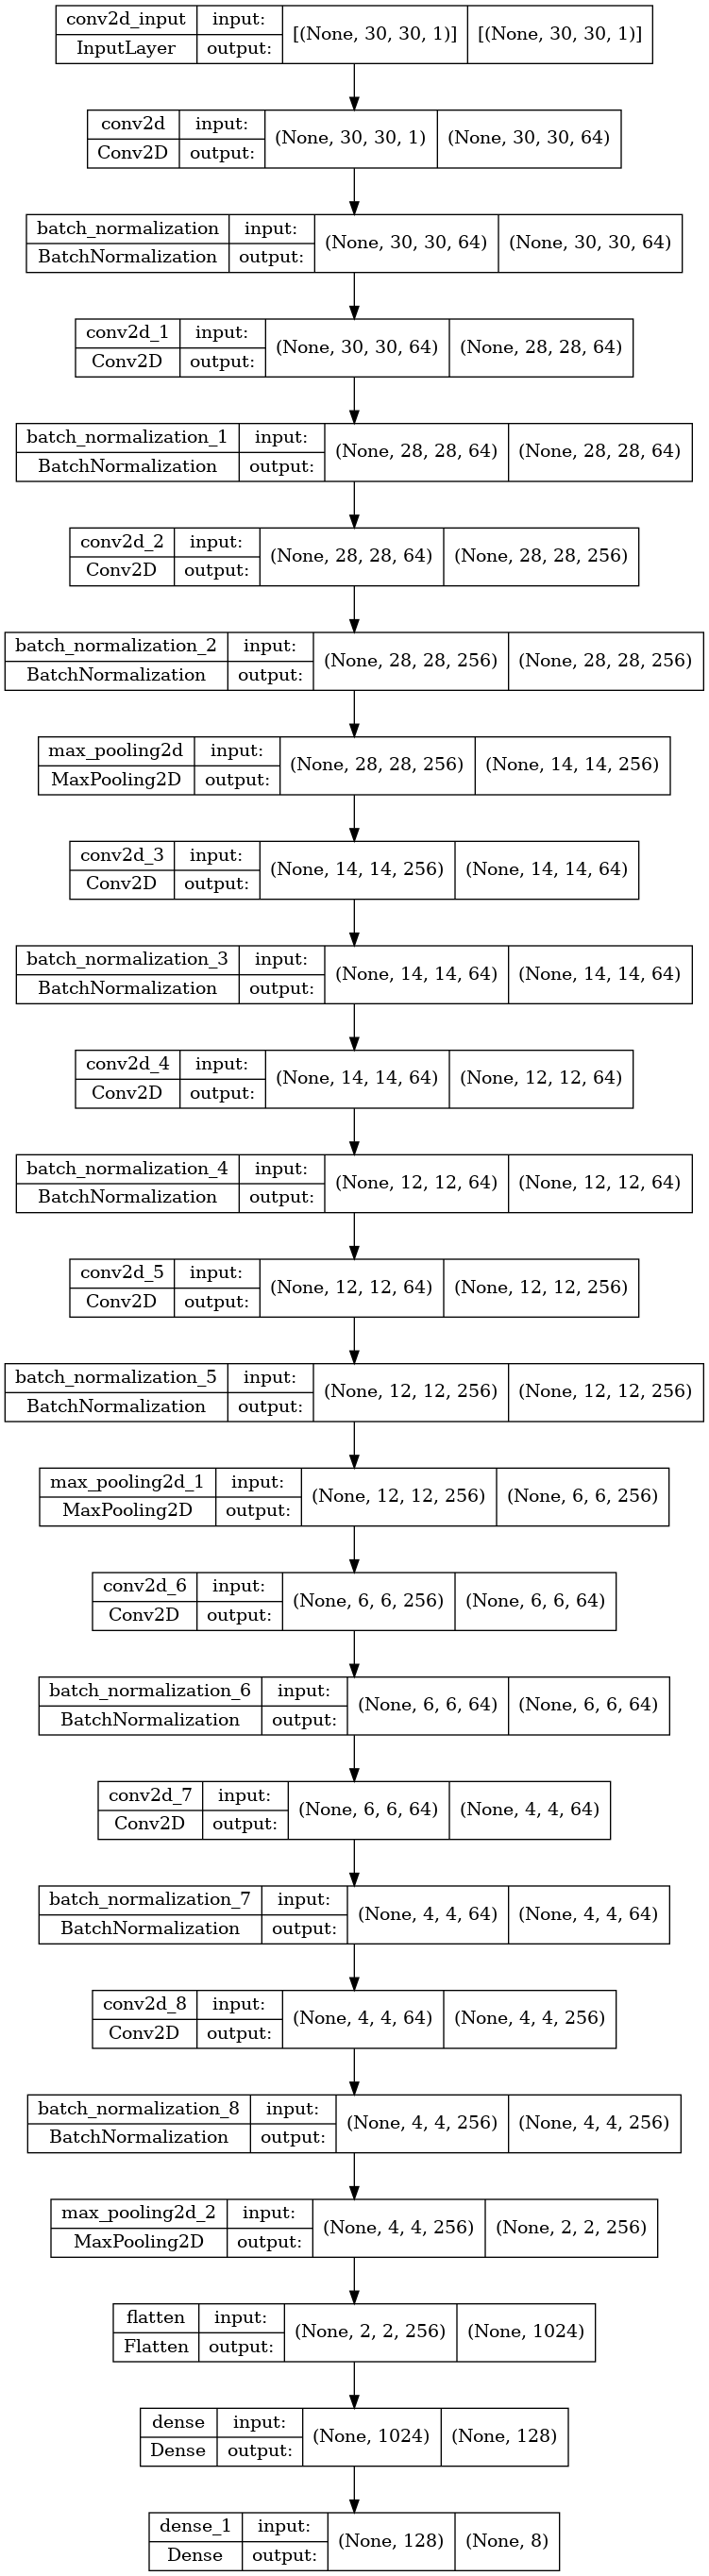

In [12]:
tf.keras.utils.plot_model(model_imported, to_file="angles_augmented_97.png", show_shapes=True)